In [7]:
import numpy as np
from torchvision.datasets import MNIST, FashionMNIST, CIFAR10
from torch.optim import SGD, Adam
from torch.nn import CrossEntropyLoss, MSELoss
from pennylane import NesterovMomentumOptimizer
from thesis.qcnn import QCNN

dims = (16, 16), (28, 28), (32, 32)
num_trials = 3

2023-06-01 01:23:47,563: (qcnn_trial_0) Number of Parameters: 51
2023-06-01 02:13:40,524: (qcnn_trial_0) Accuracy: 91.650%
2023-06-01 02:13:40,563: (qcnn_trial_1) Number of Parameters: 51
2023-06-01 03:03:29,945: (qcnn_trial_1) Accuracy: 85.950%
2023-06-01 03:03:29,970: (qcnn_trial_2) Number of Parameters: 51
2023-06-01 03:53:20,078: (qcnn_trial_2) Accuracy: 92.750%


((<Figure size 640x480 with 1 Axes>,), (<Figure size 640x480 with 1 Axes>,))

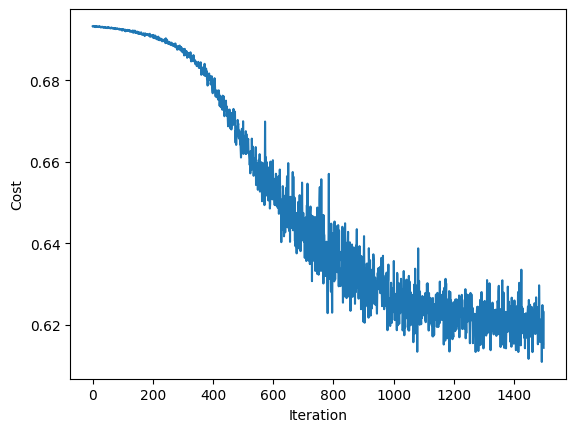

In [8]:
from thesis.quantum.operation.ansatz.convolution.v2 import ConvolutionAnsatz as A
from thesis.ml.data import BinaryData
from thesis.ml.optimize import Optimizer
from thesis.ml.data import image_transform
from thesis.experiment import Experiment
from thesis.cnn import CNN

dims = (16, 16)

data = BinaryData(FashionMNIST, image_transform(dims, flatten=True), batch_size=(80, 1000))
# optimizer = Optimizer(SGD, lr=0.01, momentum=0.9, nesterov=True)
optimizer = Optimizer(Adam)
qcnn = QCNN.with_logging(data, optimizer, CrossEntropyLoss(), epoch=10)

# qcnn.ansatz = A.from_dims(dims, num_layers=1)
# qcnn.draw()
    
experiment = Experiment(qcnn, num_trials, results_schema=["accuracy"])
# experiment(dims, 1)
experiment(A, dims, num_layers=3)

experiment.draw()